In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import locale
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
# Capacity Figure

In [3]:
file_df = 'capacity_spain_data'
df = pd.read_csv(file_df +'.csv', header=0)

In [4]:
df

,(MW),2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Hidráulica convencional y mixta,13805.0,13867.0,13867.0,13930.0,13930.0,13910.0,13910.0,13910.0,13910.0,...,15269.0,15268.0,15274.0,17042.641,17049.671,17052.940,17063.594,17097.781,17097.676,17093.176
1,Otra Hidráulica,1380.0,1433.0,1487.0,1557.0,1599.0,1696.0,1806.0,1887.0,1938.0,...,2042.0,2105.0,2105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bombeo puro,2719.0,2719.0,2719.0,2727.0,2727.0,2727.0,2747.0,2747.0,2747.0,...,2517.0,2517.0,2517.0,3331.400,3331.400,3331.400,3331.400,3331.400,3331.400,3331.400
3,Hidráulica,17904.0,18019.0,18073.0,18214.0,18256.0,18333.0,18463.0,18544.0,18595.0,...,19828.0,19890.0,19896.0,20374.041,20381.071,20384.340,20394.994,20429.181,20429.076,20424.576
4,Nuclear,7799.0,7816.0,7816.0,7876.0,7876.0,7876.0,7716.0,7716.0,7716.0,...,7866.0,7866.0,7866.0,7572.580,7572.580,7117.290,7117.290,7117.290,7117.290,7117.290
5,Carbón,11542.0,11565.0,11565.0,11565.0,11565.0,11424.0,11424.0,11356.0,11359.0,...,11114.0,11132.0,10972.0,10962.415,10030.285,10030.285,10030.285,9683.445,5733.225,4883.715
6,Fuel/Gas,8214.0,8214.0,7494.0,6930.0,6930.0,6647.0,6647.0,4768.0,4401.0,...,520.0,520.0,520.0,7.950,7.950,7.950,7.950,7.950,7.950,7.950
7,Motores diésel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,811.270,811.270,811.270,811.270,768.670,768.670,768.670
8,Turbina de gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1148.650,1148.650,1148.650,1148.650,1148.650,1148.650,1148.650
9,Turbina de vapor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,482.640,482.640,482.640,482.640,482.640,482.640,482.640


In [5]:
df1 = df.set_index('(MW)').T.reset_index()
df1.rename(columns={'index':'Year'}, inplace=True)
df1 = df1.fillna(0)

In [6]:
df1['Solar energy'] = df1['Solar Fotovoltaica']+df1['Solar Térmica']
df1['Wind'] = df1['Eólica']+df1['Hidroeólica']
df1['Total hidraulica'] = df1['Hidráulica convencional y mixta']+df1['Otra Hidráulica']
df1['Total Renovable'] = df1['Solar energy'] + df1['Eólica']+df1['Total hidraulica'] + df1['Otras renovables']+df1['Térmica renovable']


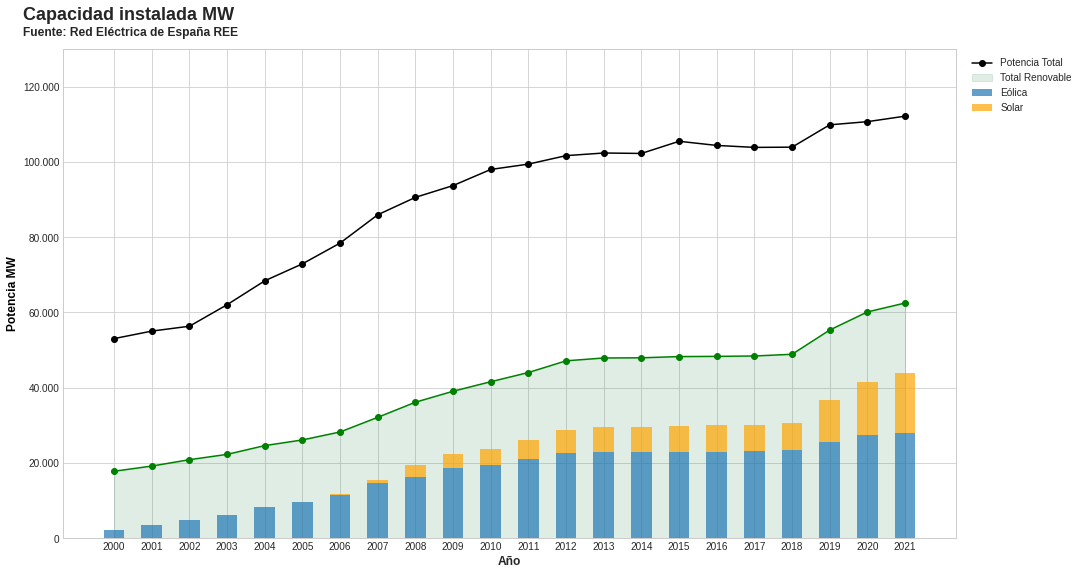

In [7]:
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["figure.figsize"] = [16,9]
fig,ax = plt.subplots()
# make a plot

#ax.set_title('Potencia Instalada por tecnología MW',color="black",fontsize=24)
ax.plot(df1['Year'],df1['Total       '], color="black", marker="o", label = "Potencia Total")
ax.plot(df1['Year'],df1['Total Renovable'], color="green", marker="o")

ax.fill_between(df1['Year'],0, df1['Total Renovable'], color ='seagreen', alpha=0.15, label = "Total Renovable")

ax.set_ylim([0,130000])
# set x-axis label
ax.set_xlabel("Año",fontsize=12, fontweight='bold')
# set y-axis label
ax.set_ylabel("Potencia MW",color="black",fontsize=12, fontweight='bold')

width = 0.55
ax.bar(df1['Year'], df1['Wind'], width,  label='Eólica', alpha=0.7)
ax.bar(df1['Year'], df1['Solar energy'], width,  label='Solar', bottom = df1['Wind'], color='orange', alpha=0.7)
#ax.bar(df1['Year'], df1['Solar Energy'], width,  bottom = (df1['Wind']+df1['Hydro']),
#       label='Solar', color='red')

#ax.legend(bbox_to_anchor=(1.12, 1), title='Etiquetas')
ax.legend(bbox_to_anchor=(1.14, 1))
plt.figtext(0.09, 0.925, "Capacidad instalada MW", fontsize=18, fontweight='bold')
plt.figtext(0.09, 0.9, "Fuente: Red Eléctrica de España REE", fontsize=12, fontweight='bold')

plt.savefig("capacidad_REE.jpg")
plt.show()

plt.show()


In [8]:
# Generation Data figure

In [9]:
file_df = 'generation_spain_data'
df = pd.read_csv(file_df +'.csv', header=0)
df

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Hidraulica,27842,39424,22598,38872,29777,19169,25330,27105.5070,22935.484,...,20653.566610,37385.436840,39181.985230,28382.579980,36114.888200,18450.618740,34117.241350,24719.015200,30614.253500,27610.640000
1,Turbinación Bombeo,0,0,0,0,0,0,0,3102.6130,2661.765,...,3201.889800,3289.677185,3415.996048,2895.365800,3134.329059,2248.964443,1993.996010,1645.505104,2748.100697,2424.806000
2,Otra Hidráulica,3836,4289,3771,4939,4544,3818,4149,0.0000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Total Hidraulica,31678,43713,26369,43811,34321,22987,29479,30208.1200,25597.249,...,23855.456410,40675.114030,42597.981280,31277.945780,39249.217260,20699.583180,36111.237360,26364.520300,33362.354200,30035.446000
4,Nuclear,62206,63708,63016,61875,63606,57359,60126,52638.9270,56460.291,...,58595.438800,54210.788120,54781.281340,54661.803310,56021.682060,55539.351050,53197.617430,55824.226780,55756.774910,51072.290000
5,Carbón,76374,68091,78768,72249,76358,77393,66006,70630.1030,46508.363,...,53779.891170,39441.537720,43246.056500,52616.477600,37313.777750,45019.420390,37276.805720,12670.637400,5021.717210,4446.420000
6,Fuel+Gas,10249,12398,16474,8035,7697,10013,5905,2090.7650,2074.895,...,-3.812641,-2.012715,-0.819731,0.016618,0.000235,0.000000,0.000000,0.000000,0.000000,0.000000
7,Motores diésel,0,0,0,0,0,0,0,3578.8410,3649.238,...,3476.850792,3218.330298,3227.383088,3345.074394,3602.463490,3456.023552,3178.179141,2836.053144,2399.438012,2362.820493
8,Turbina de gas,0,0,0,0,0,0,0,988.2210,749.196,...,939.821432,883.666428,946.991236,915.771849,616.037302,871.160048,1049.279011,670.532077,406.585989,393.596737
9,Turbina de vapor,0,0,0,0,0,0,0,3306.8050,3414.241,...,2681.695927,2463.796999,2070.771428,2222.950567,2536.143003,2674.393850,2455.432297,2189.010668,1387.606690,1016.440110


In [10]:
df1 = df.set_index('Unnamed: 0').T.reset_index()
df1.rename(columns={'index':'Year'}, inplace=True)
df1['Total Renovable'] = df1['Total Solar'] + df1['Eolica']+df1['Total Hidraulica'] + df1['Otras renovables']+df1['Resisuos renovables']


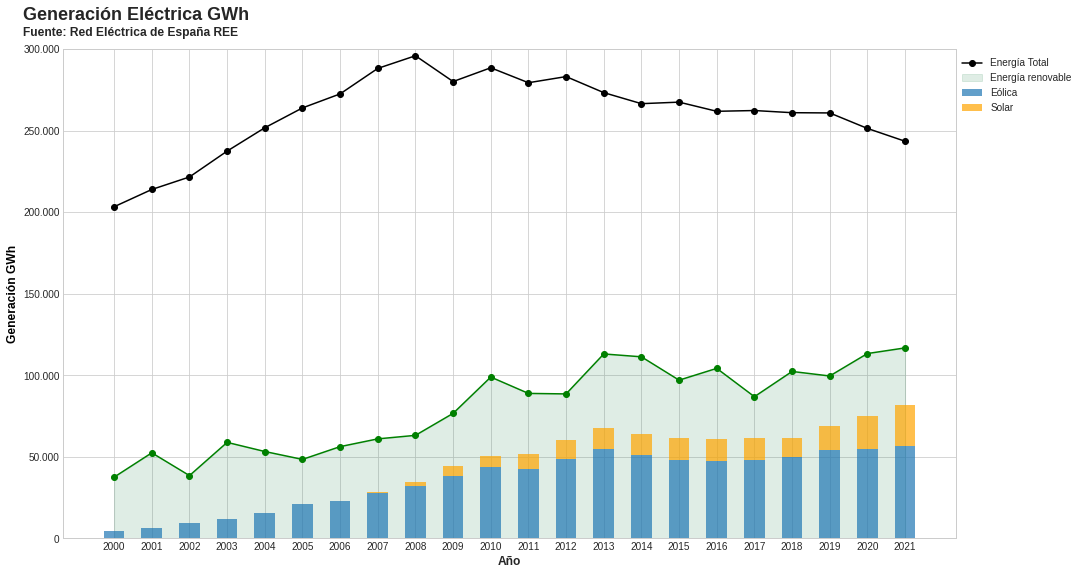

In [11]:

locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams["figure.figsize"] = [16,9]

fig,ax = plt.subplots()
# make a plot
#ax.set_title('Generación Eléctrica GWh',color = "black", fontsize=14, loc='left')
ax.plot(df1['Year'],df1['Generación Total'], color="black", marker="o", label = "Energía Total")
ax.plot(df1['Year'],df1['Total Renovable'], color="green", marker="o")

ax.fill_between(df1['Year'],0, df1['Total Renovable'], color ='seagreen',alpha = 0.15, label="Energía renovable")

ax.set_ylim([0,300000])
# set x-axis label
ax.set_xlabel("Año",fontsize=12, fontweight='bold')
# set y-axis label
ax.set_ylabel("Generación GWh",color="black",fontsize=12, fontweight='bold')

#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

width = 0.55
ax.bar(df1['Year'], df1['Eolica'], width,  label='Eólica', alpha=0.7)
ax.bar(df1['Year'], df1['Total Solar'], width,  label='Solar', bottom = df1['Eolica'], color='orange', alpha=0.7)
#ax.bar(df1['Year'], df1['Hidráulica'], width,  bottom = (df1['Eólica']+df1['Solar fotovoltaica']),
#       label='Hydro', color='red')

#ax.legend(bbox_to_anchor=(1.12, 1), title='Etiquetas')
ax.legend(bbox_to_anchor=(1.14, 1))
plt.figtext(0.09, 0.925, "Generación Eléctrica GWh", fontsize=18, fontweight='bold')
plt.figtext(0.09, 0.9, "Fuente: Red Eléctrica de España REE", fontsize=12, fontweight='bold')

plt.savefig("generacion_REE.jpg")
plt.show()

In [12]:
#1
file_df = 'capacity_spain_data'
df = pd.read_csv(file_df +'.csv', header=0)
df1 = df.set_index('(MW)').T.reset_index()
df1.rename(columns={'index':'Year'}, inplace=True)
df1 = df1.fillna(0)
df1['Solar energy'] = df1['Solar Fotovoltaica']+df1['Solar Térmica']
df1['Wind'] = df1['Eólica']+df1['Hidroeólica']
df1['Total hidraulica'] = df1['Hidráulica convencional y mixta']+df1['Otra Hidráulica']
df1['Total Renovable'] = df1['Solar energy'] + df1['Eólica']+df1['Total hidraulica'] + df1['Otras renovables']+df1['Térmica renovable']

#2
file_df = 'generation_spain_data'
df = pd.read_csv(file_df +'.csv', header=0)
df2 = df.set_index('Unnamed: 0').T.reset_index()
df2.rename(columns={'index':'Year'}, inplace=True)
df2['Total Renovable'] = df2['Total Solar'] + df2['Eolica']+df2['Total Hidraulica'] + df2['Otras renovables']+df2['Resisuos renovables']

#3
file_df = 'capacity_germany_data'
df = pd.read_csv(file_df +'.csv', header=0)
df3 = df.set_index('GW').T.reset_index()
df3.rename(columns={'index':'Year'}, inplace=True)
df3 = df3.fillna(0)
df3['Wind'] = df3['wind offshore']+df3['wind onshore']
df3['Total hidraulica'] = df3['Hydro Power']+df3['Almacenamiento estacional']
df3['Total Renovable'] = df3['Solar'] + df3['Wind']+df3['Total hidraulica'] + df3['Biomass']
df3['Capacidad Total'] = df3['Total Renovable']+df3['Natural Gas']+df3['Oil']+df3['Lignite']+df3['Nuclear']+ \
                         df3['Coal']
#4

file_df = 'generacion_alemania_data-1'
df = pd.read_csv(file_df +'.csv', header=0)
df4 = df.set_index('TWh').T.reset_index()
df4.rename(columns={'index':'Year'}, inplace=True)
df4['Total Solar'] = df1['Solar Fotovoltaica']
#df1['Total Renovable'] = df1['Total Solar'] + df1['Eolica']+df1['Total Hidraulica'] + df1['Otras renovables']+df1['Resisuos renovables']

df4['Total Renovable'] = df4['Solar Fotovoltaica']+df4['Eolica onshore']+df4['Eolica offshore']+ \
                         df4['Biomasa'] + df4['Bombeo']+df4['Hidroelectrica']
df4['Total Generacion'] = df4['Lignito'] + df4['Carbon'] + df4['Nuclear']+df4['Gas']+df4['Oil']+ \
                          df4['Residuos'] + df4['Residuos domesticos'] + df4['Residuos industriales']+ \
                          df4['Total Renovable']
df4['Total Eolica'] = df4['Eolica onshore'] + df4['Eolica offshore']
df4['Total Solar'] = df4['Solar Fotovoltaica']


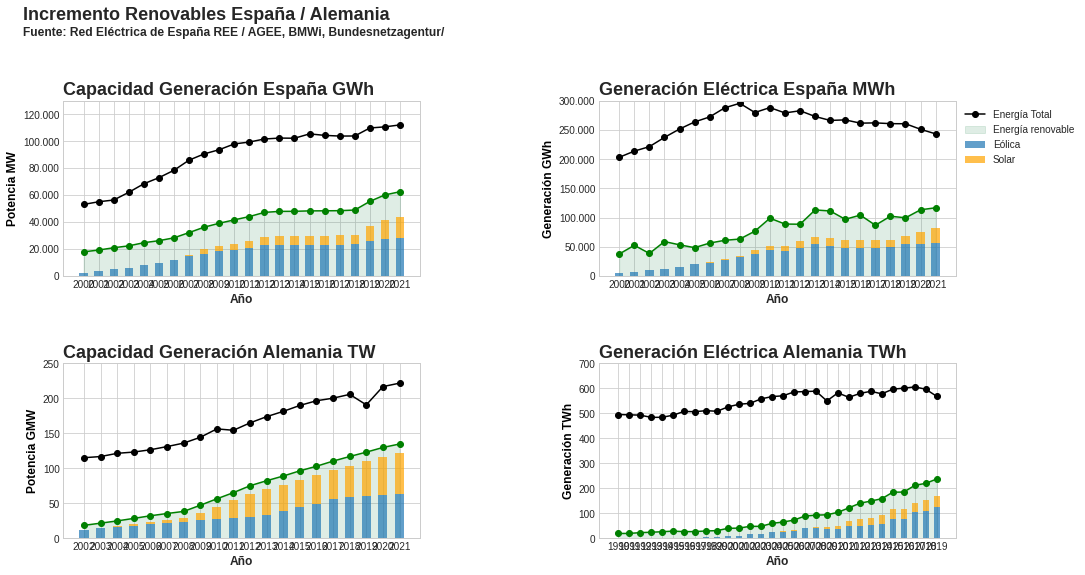

In [13]:
# double plot

locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
plt.rcParams['axes.formatter.use_locale'] = True
plt.rcParams["figure.figsize"] = [16,9]

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
fig.subplots_adjust(hspace=.5, wspace=.5, top=.8)

# plot 1
#ax.set_title('Generación Eléctrica GWh',color = "black", fontsize=14, loc='left')
#ax.set_title('Potencia Instalada por tecnología MW',color="black",fontsize=24)
axs[0,0].plot(df1['Year'],df1['Total       '], color="black", marker="o", label = "Potencia Total")
axs[0,0].plot(df1['Year'],df1['Total Renovable'], color="green", marker="o")

axs[0,0].fill_between(df1['Year'],0, df1['Total Renovable'], color ='seagreen', alpha=0.15, label = "Total Renovable")

axs[0,0].set_ylim([0,130000])
# set x-axis label
axs[0,0].set_xlabel("Año",fontsize=12, fontweight='bold')
# set y-axis label
axs[0,0].set_ylabel("Potencia MW",color="black",fontsize=12, fontweight='bold')

width = 0.55
axs[0,0].bar(df1['Year'], df1['Wind'], width,  label='Eólica', alpha=0.7)
axs[0,0].bar(df1['Year'], df1['Solar energy'], width,  label='Solar', bottom = df1['Wind'], color='orange', alpha=0.7)
axs[0,0].set_title("Capacidad Generación España GWh", loc="left", fontsize=18, fontweight='bold')

#plot 2

#ax.set_title('Generación Eléctrica GWh',color = "black", fontsize=14, loc='left')
axs[0,1].plot(df2['Year'],df2['Generación Total'], color="black", marker="o", label = "Energía Total")
axs[0,1].plot(df2['Year'],df2['Total Renovable'], color="green", marker="o")

axs[0,1].fill_between(df2['Year'],0, df2['Total Renovable'], color ='seagreen',alpha = 0.15, label="Energía renovable")

axs[0,1].set_ylim([0,300000])
# set x-axis label
axs[0,1].set_xlabel("Año",fontsize=12, fontweight='bold')
# set y-axis label
axs[0,1].set_ylabel("Generación GWh",color="black",fontsize=12, fontweight='bold')

#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

width = 0.55
axs[0,1].bar(df2['Year'], df2['Eolica'], width,  label='Eólica', alpha=0.7)
axs[0,1].bar(df2['Year'], df2['Total Solar'], width,  label='Solar', bottom = df2['Eolica'], color='orange', alpha=0.7)

axs[0,1].legend(bbox_to_anchor=(1., 1))
axs[0,1].set_title("Generación Eléctrica España MWh", loc="left", fontsize=18, fontweight='bold')

#plot 3

#ax.set_title('Potencia Instalada por tecnología MW',color="black",fontsize=24)
axs[1,0].plot(df3['Year'],df3['Capacidad Total'], color="black", marker="o", label = "Potencia Total")
axs[1,0].plot(df3['Year'],df3['Total Renovable'], color="green", marker="o")

axs[1,0].fill_between(df3['Year'],0, df3['Total Renovable'], color ='seagreen', alpha=0.15, label = "Total Renovable")

axs[1,0].set_ylim([0,250])
axs[1,0].set_xlabel("Año",fontsize=12, fontweight='bold')
axs[1,0].set_ylabel("Potencia GMW",color="black",fontsize=12, fontweight='bold')

width = 0.55
axs[1,0].bar(df3['Year'], df3['Wind'], width,  label='Eólica', alpha=0.7)
axs[1,0].bar(df3['Year'], df3['Solar'], width,  label='Solar', bottom = df3['Wind'], color='orange', alpha=0.7)

axs[1,0].set_title("Capacidad Generación Alemania TW", loc="left", fontsize=18, fontweight='bold')

#plot 4

# make a plot
#ax.set_title('Generación Eléctrica GWh',color = "black", fontsize=14, loc='left')
axs[1,1].plot(df4['Year'],df4['Total Generacion'], color="black", marker="o", label = "Energía Total")
axs[1,1].plot(df4['Year'],df4['Total Renovable'], color="green", marker="o")

axs[1,1].fill_between(df4['Year'],0, df4['Total Renovable'], color ='seagreen',alpha = 0.15, label="Energía renovable")

axs[1,1].set_ylim([0,700])
# set x-axis label
axs[1,1].set_xlabel("Año",fontsize=12, fontweight='bold')
# set y-axis label
axs[1,1].set_ylabel("Generación TWh",color="black",fontsize=12, fontweight='bold')

#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

width = 0.55
axs[1,1].bar(df4['Year'], df4['Total Eolica'], width,  label='Eólica', alpha=0.7)
axs[1,1].bar(df4['Year'], df4['Total Solar'], width,  label='Solar', bottom = df4['Total Eolica'], color='orange', alpha=0.7)
#ax.bar(df1['Year'], df1['Hidráulica'], width,  bottom = (df1['Eólica']+df1['Solar fotovoltaica']),
#       label='Hydro', color='red')

#axs[1,1].title.set_text('Second Plot')
axs[1,1].set_title("Generación Eléctrica Alemania TWh", loc="left", fontsize=18, fontweight='bold')

# Render total figure
plt.figtext(0.09, 0.925, "Incremento Renovables España / Alemania", fontsize=18, fontweight='bold')
plt.figtext(0.09, 0.9, "Fuente: Red Eléctrica de España REE / AGEE, BMWi, Bundesnetzagentur/ ", fontsize=12, fontweight='bold')


plt.savefig("generacion__ESP_DEU.pdf")
plt.show()